In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from hmmlearn import hmm
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv(r"D:\TimeSeries\BTTH2\time_series_data_human_activities.csv\time_series_data_human_activities.csv") 

#  Lọc chỉ giữ 4 hoạt động
selected_activities = ['Walking', 'Jogging', 'Upstairs', 'Downstairs']
filtered_df = df[df['activity'].isin(selected_activities)].copy()

# Kiểm tra hoạt động 
activity_labels = df['activity'].unique()
print("Các nhãn hoạt động có trong dữ liệu:", activity_labels)

required_activities = ['Walking', 'Jogging', 'Upstairs']
missing = [activity for activity in required_activities if activity not in activity_labels]

if not missing:
    print(" Dữ liệu có đầy đủ 3 hoạt động: Đi bộ (Walking), Chạy (Jogging), Leo cầu thang (Upstairs).")
else:
    print(" Dữ liệu thiếu các hoạt động sau:", missing)

 
# Kiểm tra tên cột để xác nhận
print(df.columns)

# Trích xuất đặc trưng và nhãn
X = df[['x-axis', 'y-axis', 'z-axis']].values
y = df['activity'].values  # Đổi từ 'label' sang 'activity'

# Mã hóa nhãn
le = LabelEncoder()
y_encoded = le.fit_transform(y)

Các nhãn hoạt động có trong dữ liệu: ['Walking' 'Jogging' 'Upstairs' 'Downstairs' 'Sitting' 'Standing']
 Dữ liệu có đầy đủ 3 hoạt động: Đi bộ (Walking), Chạy (Jogging), Leo cầu thang (Upstairs).
Index(['user', 'activity', 'timestamp', 'x-axis', 'y-axis', 'z-axis'], dtype='object')


In [ ]:
# Huấn luyện mô hình HMM cho từng hoạt động 

from hmmlearn import hmm

models = {}
n_states = 4  # số trạng thái ẩn
max_iter = 100  # số vòng lặp tối đa

for label in np.unique(y):
    # Cắt bớt dữ liệu để huấn luyện nhanh (tùy chọn - có thể bỏ)
    X_activity = X[y == label][:1000]  # chỉ lấy 1000 mẫu đầu cho mỗi hoạt động
    
    lengths = [len(X_activity)]
    
    model = hmm.GaussianHMM(
        n_components=n_states,
        covariance_type="diag",
        n_iter=max_iter,
        verbose=True,
        random_state=42
    )
    
    print(f"Đang huấn luyện HMM cho hoạt động: {label}")
    model.fit(X_activity, lengths)
    
    models[label] = model
    print(f"Đã huấn luyện xong mô hình cho: {label}\n")



Đang huấn luyện HMM cho hoạt động: Downstairs


         1   -9183.47954760             +nan
         2   -8813.25052863    +370.22901897
         3   -8769.11570122     +44.13482741
         4   -8738.13740683     +30.97829439
         5   -8704.79936878     +33.33803805
         6   -8668.89888126     +35.90048752
         7   -8637.90650893     +30.99237233
         8   -8618.09208792     +19.81442101
         9   -8606.41593343     +11.67615449
        10   -8599.55827849      +6.85765494
        11   -8595.35684514      +4.20143334
        12   -8592.63933813      +2.71750701
        13   -8590.75348212      +1.88585601
        14   -8589.27130570      +1.48217642
        15   -8587.88131304      +1.38999266
        16   -8586.34123183      +1.54008121
        17   -8584.45296864      +1.88826319
        18   -8581.97209158      +2.48087706
        19   -8578.59655750      +3.37553409
        20   -8574.90552630      +3.69103119
        21   -8571.42514334      +3.48038297
        22   -8567.85651358      +3.56862976
        23

Đã huấn luyện xong mô hình cho: Downstairs

Đang huấn luyện HMM cho hoạt động: Jogging


         1  -11018.61435328             +nan
         2  -10313.45411366    +705.16023962
         3  -10232.74764098     +80.70647268
         4  -10150.01133316     +82.73630782
         5  -10086.11007838     +63.90125478
         6  -10044.38525631     +41.72482207
         7  -10017.98014750     +26.40510882
         8   -9999.40826469     +18.57188281
         9   -9985.85169611     +13.55656858
        10   -9976.26750841      +9.58418770
        11   -9968.91869291      +7.34881550
        12   -9962.87251965      +6.04617326
        13   -9958.18584652      +4.68667313
        14   -9955.01586155      +3.16998497
        15   -9953.12530700      +1.89055455
        16   -9952.09609313      +1.02921386
        17   -9951.57244478      +0.52364836
        18   -9951.31638879      +0.25605598
        19   -9951.19000811      +0.12638068
        20   -9951.12369287      +0.06631524
        21   -9951.08588183      +0.03781104
        22   -9951.06272856      +0.02315327
        23

Đã huấn luyện xong mô hình cho: Jogging

Đang huấn luyện HMM cho hoạt động: Sitting


         1    3110.63762377             +nan
         2    3931.12769257    +820.49006879
         3    4489.83439290    +558.70670033
         4    4749.79845589    +259.96406299
         5    4956.22323460    +206.42477871
         6    5011.24510033     +55.02186573
         7    5016.71307025      +5.46796991
         8    5017.82978611      +1.11671586
         9    5018.33855639      +0.50877028
        10    5018.67396259      +0.33540620
        11    5018.91500159      +0.24103900
        12    5019.08127504      +0.16627345
        13    5019.19058411      +0.10930907
        14    5019.26119589      +0.07061178
        15    5019.30731084      +0.04611496
        16    5019.33835273      +0.03104188
        17    5019.36024365      +0.02189092
        18    5019.37673668      +0.01649303
        19    5019.39035525      +0.01361857
        20    5019.40303012      +0.01267486
        21    5019.41662153      +0.01359141
        22    5019.43357589      +0.01695436
        23

Đã huấn luyện xong mô hình cho: Sitting

Đang huấn luyện HMM cho hoạt động: Standing


         1     256.34442232             +nan
         2    2783.06621976   +2526.72179744
         3    3088.93574530    +305.86952554
         4    3278.03196787    +189.09622257
         5    3335.46236824     +57.43040038
         6    3392.54184738     +57.07947914
         7    3467.45615812     +74.91431074
         8    3516.12819052     +48.67203240
         9    3535.64524406     +19.51705353
        10    3547.21501399     +11.56976994
        11    3553.33536348      +6.12034949
        12    3555.78258503      +2.44722154
        13    3556.52309783      +0.74051281
        14    3556.76484184      +0.24174401
        15    3556.86919975      +0.10435790
        16    3556.92905179      +0.05985204
        17    3556.98941023      +0.06035844
        18    3557.11868358      +0.12927335
        19    3557.45408931      +0.33540573
        20    3558.03699755      +0.58290824
        21    3558.51467695      +0.47767940
        22    3558.72913576      +0.21445881
        23

Đã huấn luyện xong mô hình cho: Standing

Đang huấn luyện HMM cho hoạt động: Upstairs


         1   -9883.41524735             +nan
         2   -9213.04816532    +670.36708203
         3   -9166.97910213     +46.06906319
         4   -9146.30939236     +20.66970977
         5   -9123.33864708     +22.97074528
         6   -9079.91822329     +43.42042379
         7   -9035.49173301     +44.42649028
         8   -9013.96600882     +21.52572419
         9   -9004.22501967      +9.74098915
        10   -8998.96360249      +5.26141718
        11   -8995.67918847      +3.28441401
        12   -8992.76804573      +2.91114274
        13   -8989.36803524      +3.40001049
        14   -8985.39215560      +3.97587964
        15   -8981.07933292      +4.31282268
        16   -8976.55435805      +4.52497486
        17   -8971.75666865      +4.79768940
        18   -8966.63350985      +5.12315881
        19   -8961.28411819      +5.34939165
        20   -8955.93351679      +5.35060140
        21   -8950.81332799      +5.12018880
        22   -8946.07953527      +4.73379272
        23

Đã huấn luyện xong mô hình cho: Upstairs

Đang huấn luyện HMM cho hoạt động: Walking
Đã huấn luyện xong mô hình cho: Walking



         1   -8782.44505477             +nan
         2   -8447.10363453    +335.34142024
         3   -8117.90232534    +329.20130920
         4   -8040.86756572     +77.03475961
         5   -7990.92980510     +49.93776062
         6   -7960.91691540     +30.01288971
         7   -7952.60060646      +8.31630894
         8   -7944.44402093      +8.15658553
         9   -7931.97675743     +12.46726349
        10   -7915.88063684     +16.09612059
        11   -7892.89289572     +22.98774113
        12   -7851.80786580     +41.08502992
        13   -7788.02880355     +63.77906225
        14   -7707.77081359     +80.25798995
        15   -7648.48114706     +59.28966653
        16   -7625.66562112     +22.81552594
        17   -7619.52621624      +6.13940488
        18   -7617.75662419      +1.76959206
        19   -7617.13794707      +0.61867711
        20   -7616.87235378      +0.26559330
        21   -7616.72441030      +0.14794348
        22   -7616.62714057      +0.09726972
        23

In [ ]:
# Hàm dự đoán hành vi từ HMM 
def predict_activity_hmm(sequence):
    scores = {activity: model.score(sequence) for activity, model in models.items()}
    return max(scores, key=scores.get)


In [ ]:
# Particle Filter 
class ParticleFilter:
    def __init__(self, num_particles, transition_model, observation_model, initial_state_sampler):
        self.num_particles = num_particles
        self.transition_model = transition_model
        self.observation_model = observation_model
        self.particles = [initial_state_sampler() for _ in range(num_particles)]

    def update(self, observation):
        weights = [self.observation_model(p, observation) for p in self.particles]
        if sum(weights) == 0:
            weights = [1.0] * self.num_particles
        weights = [w / sum(weights) for w in weights]
        new_particles = random.choices(self.particles, weights=weights, k=self.num_particles)
        self.particles = [self.transition_model(p) for p in new_particles]
        return max(set(self.particles), key=self.particles.count)


In [ ]:
# Mô hình chuyển trạng thái và quan sát 
states = list(models.keys())

def transition_model(state):
    return random.choice(states) if random.random() < 0.2 else state

def observation_model(state, observation):
    try:
        return np.exp(models[state].score(observation))
    except:
        return 0.0

def initial_state_sampler():
    return random.choice(states)


In [7]:
for activity, model in models.items():
    print(f"Mô hình HMM cho hoạt động: {activity}")
    print("Số trạng thái ẩn:", model.n_components)
    print("Ma trận chuyển trạng thái:")
    print(model.transmat_)
    print("Phương sai của các quan sát (covars):")
    print(model.covars_)
    print("="*50)


Mô hình HMM cho hoạt động: Downstairs
Số trạng thái ẩn: 4
Ma trận chuyển trạng thái:
[[5.56901267e-01 7.90535420e-02 2.77180151e-01 8.68650405e-02]
 [1.68534895e-01 2.51268563e-01 6.53101784e-03 5.73665524e-01]
 [1.66195893e-02 2.64937623e-01 6.99196915e-01 1.92458731e-02]
 [9.06572863e-01 1.28391188e-30 3.41269706e-23 9.34271367e-02]]
Phương sai của các quan sát (covars):
[[[44.94696078  0.          0.        ]
  [ 0.         17.92764917  0.        ]
  [ 0.          0.         22.15475046]]

 [[ 7.27913377  0.          0.        ]
  [ 0.          5.18650861  0.        ]
  [ 0.          0.          2.07793152]]

 [[14.96841584  0.          0.        ]
  [ 0.          6.92206457  0.        ]
  [ 0.          0.         12.5841504 ]]

 [[ 8.40728298  0.          0.        ]
  [ 0.         10.18577732  0.        ]
  [ 0.          0.          2.27468042]]]
Mô hình HMM cho hoạt động: Jogging
Số trạng thái ẩn: 4
Ma trận chuyển trạng thái:
[[8.51283556e-01 1.03529924e-10 5.53846331e-03 1.43177

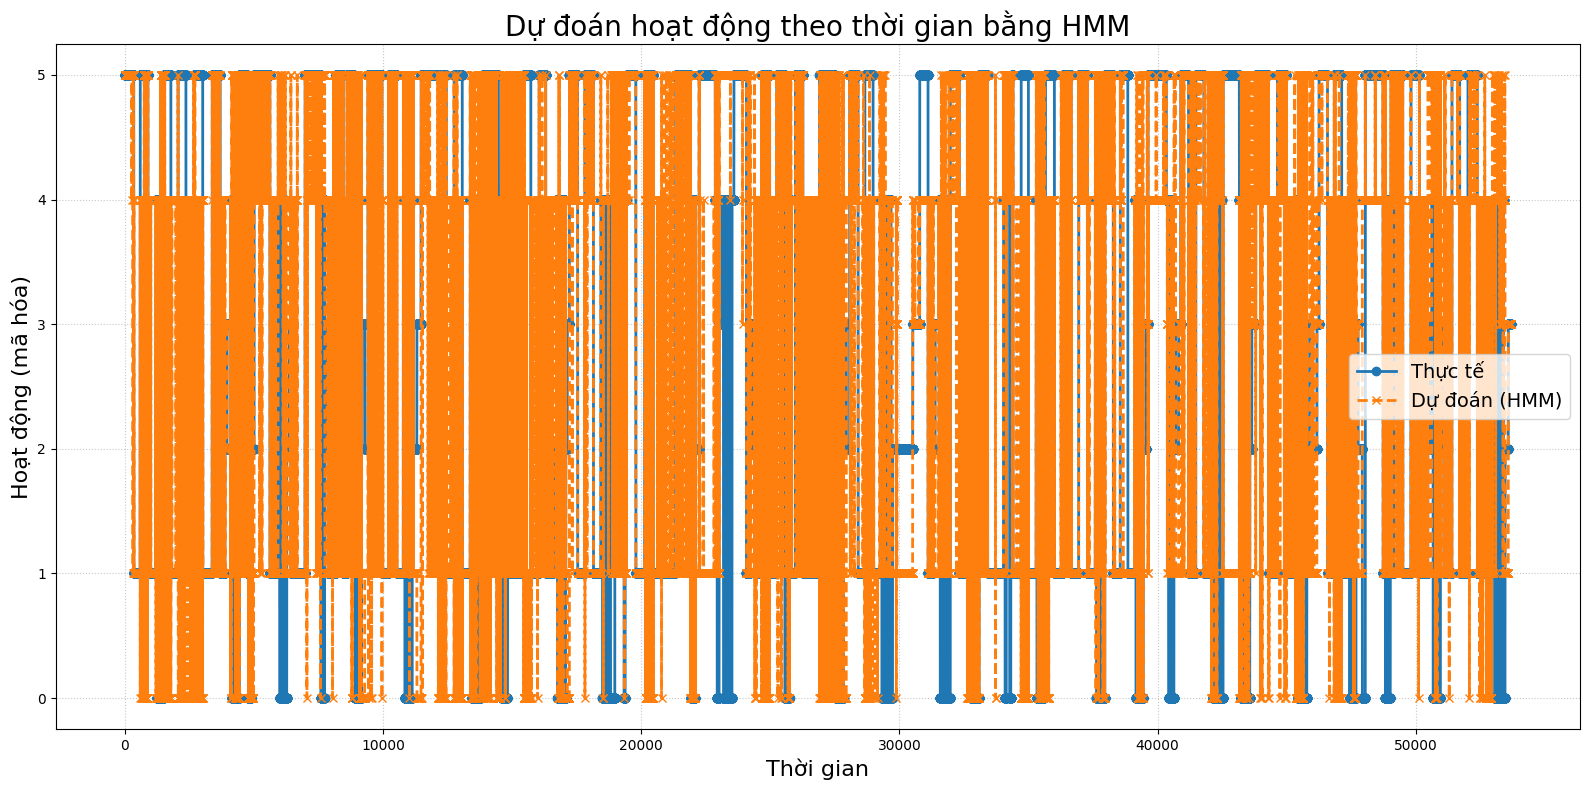

In [ ]:
# Trực quan hóa hoạt động dự đoán theo thời gian
window_size = 20
step = 20
preds = []
true_labels = []

for i in range(0, len(X) - window_size, step):
    seq = X[i:i+window_size]
    label = y[i]
    pred = predict_activity_hmm(seq)
    preds.append(pred)
    true_labels.append(label)

true_labels_num = le.transform(true_labels)
preds_num = le.transform(preds)

plt.figure(figsize=(16, 8))  # Tăng kích thước hình vẽ để dễ nhìn hơn
plt.plot(true_labels_num, label='Thực tế', marker='o', linestyle='-', linewidth=2) # Đường liền nét cho thực tế
plt.plot(preds_num, label='Dự đoán (HMM)', marker='x', linestyle='--', linewidth=2) # Đường đứt nét cho dự đoán

plt.title("Dự đoán hoạt động theo thời gian bằng HMM", fontsize=20)  # Tiêu đề lớn và rõ ràng
plt.ylabel("Hoạt động (mã hóa)", fontsize=16)  # Nhãn trục y rõ ràng
plt.xlabel("Thời gian", fontsize=16)  # Nhãn trục x rõ ràng

plt.legend(fontsize=14)  # Chú thích dễ đọc
plt.grid(True, linestyle=':', alpha=0.7)  # Lưới mờ để không gây xao nhãng

plt.tight_layout()  # Đảm bảo các thành phần không bị đè lên nhau
plt.show()